In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)
def load_data(file_name, folder1='Dataset 1/', folder2='Dataset 2/'):
    try:
        df1 = pd.read_csv(folder1 + file_name)
        df2 = pd.read_csv(folder2 + file_name)
        return pd.concat([df1, df2], ignore_index=True)
    except FileNotFoundError as e:
        print(f"Error loading {file_name}: {e}")
        return pd.DataFrame()
google_ads_df = load_data('googleads-performance.csv')
meta_ads_df = load_data('metaads-performance.csv')
microsoft_ads_df = load_data('microsoftads-performance.csv')
website_landings_df = load_data('website-landings.csv')
for df, name in zip([google_ads_df, meta_ads_df, microsoft_ads_df, website_landings_df], 
                    ['Google Ads', 'Meta Ads', 'Microsoft Ads', 'Website Landings']):
    print(f"\n{name} DataFrame:")
    print(df.head())
def preprocess_ads_data(df, platform):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
    df['Platform'] = platform
    df.fillna(0, inplace=True)
    return df
google_ads_df = preprocess_ads_data(google_ads_df, 'Google Ads')
meta_ads_df = preprocess_ads_data(meta_ads_df, 'Meta Ads')
microsoft_ads_df = preprocess_ads_data(microsoft_ads_df, 'Microsoft Ads')


Google Ads DataFrame:
         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  

Meta Ads DataFrame:
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue
0  2024-01-01      36034.0  27263.0  209.1   608.0          4.0    158.2
1  2024-01-02      30804.0  22648.0  204.9   516.0         11.0   1412.8
2  2024-01-03      26372.0  18947.0  198.7   429.0          4.0    371.5
3  2024-01-04      17354.0  11436.0  131.2   324.0          4.0      0.0
4  2024-01-05      12036.0   7921.0  114.0   224.0      

Ads Data Overview:
           Date     Campaign type  Impressions  Clicks   Cost  Conversions  \
1080 2024-06-28          Shopping      15266.0   229.0  129.9          8.0   
1081 2024-06-29  Search & content        365.0    87.0  133.7         15.0   
1082 2024-06-29          Shopping      14916.0   247.0  129.4         10.0   
1083 2024-06-30  Search & content        303.0    69.0   99.2         11.0   
1084 2024-06-30          Shopping      11646.0   186.0   94.3          6.0   

      Revenue       Platform  Reach  
1080   2522.0  Microsoft Ads    0.0  
1081   4178.8  Microsoft Ads    0.0  
1082   1239.9  Microsoft Ads    0.0  
1083   1721.7  Microsoft Ads    0.0  
1084    826.3  Microsoft Ads    0.0  

Ads Data Summary Statistics:
                                Date    Impressions        Clicks  \
count                           2633    2633.000000   2633.000000   
mean   2024-03-30 03:18:31.583744768   59216.750855    542.647550   
min              2024-01-01 00:00:00       0.00

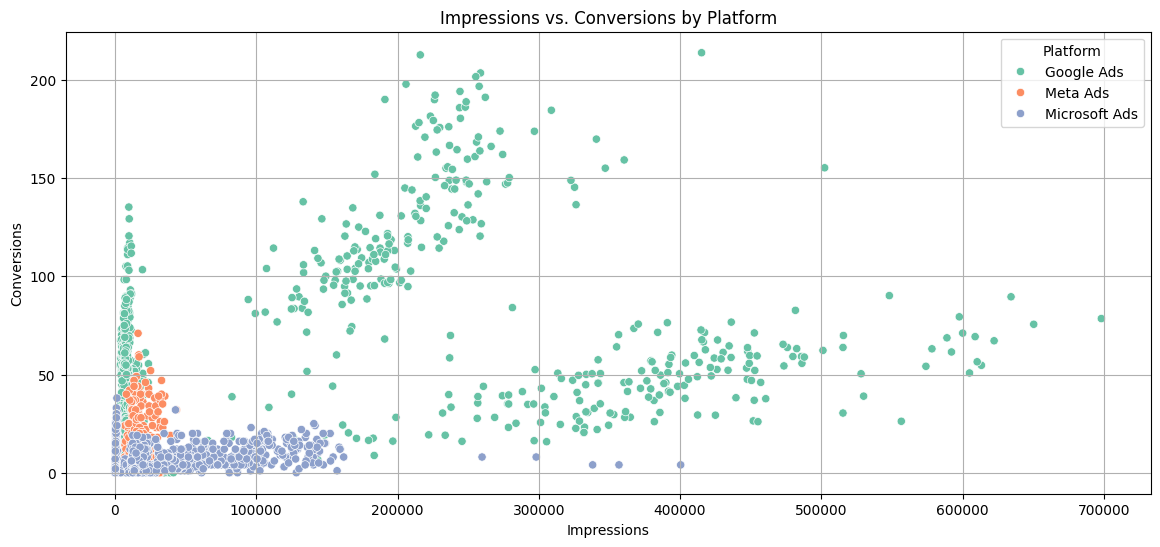

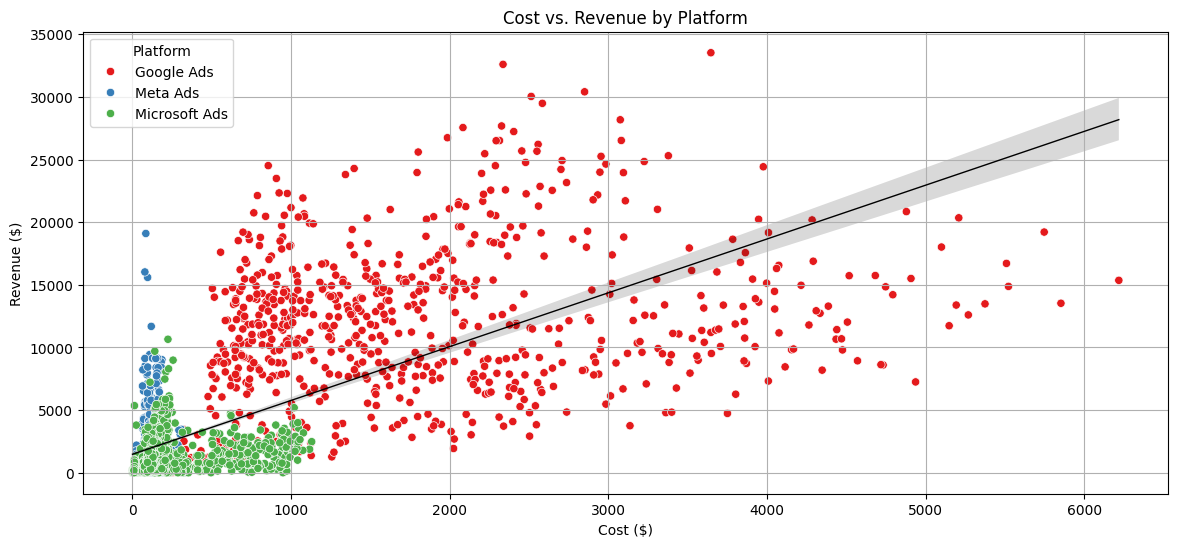

In [2]:
website_landings_df['Website Landing Time'] = pd.to_datetime(website_landings_df['Website Landing Time'], format='%Y-%m-%d %H:%M:%S')
website_landings_df['Is Converted'] = website_landings_df['Is Converted'].astype(int)
ads_data = pd.concat([google_ads_df, meta_ads_df, microsoft_ads_df], axis=0)
ads_data['Reach'] = ads_data['Reach'].fillna(0)
print("Ads Data Overview:")
print(ads_data.tail())
print("\nAds Data Summary Statistics:")
print(ads_data.describe())
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ads_data, x='Impressions', y='Conversions', hue='Platform', palette='Set2')
plt.title('Impressions vs. Conversions by Platform')
plt.xlabel('Impressions')
plt.ylabel('Conversions')
plt.legend(title='Platform')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ads_data, x='Cost', y='Revenue', hue='Platform', palette='Set1')
sns.regplot(data=ads_data, x='Cost', y='Revenue', scatter=False, color='black', line_kws={"linewidth": 1})
plt.title('Cost vs. Revenue by Platform')
plt.xlabel('Cost ($)')
plt.ylabel('Revenue ($)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

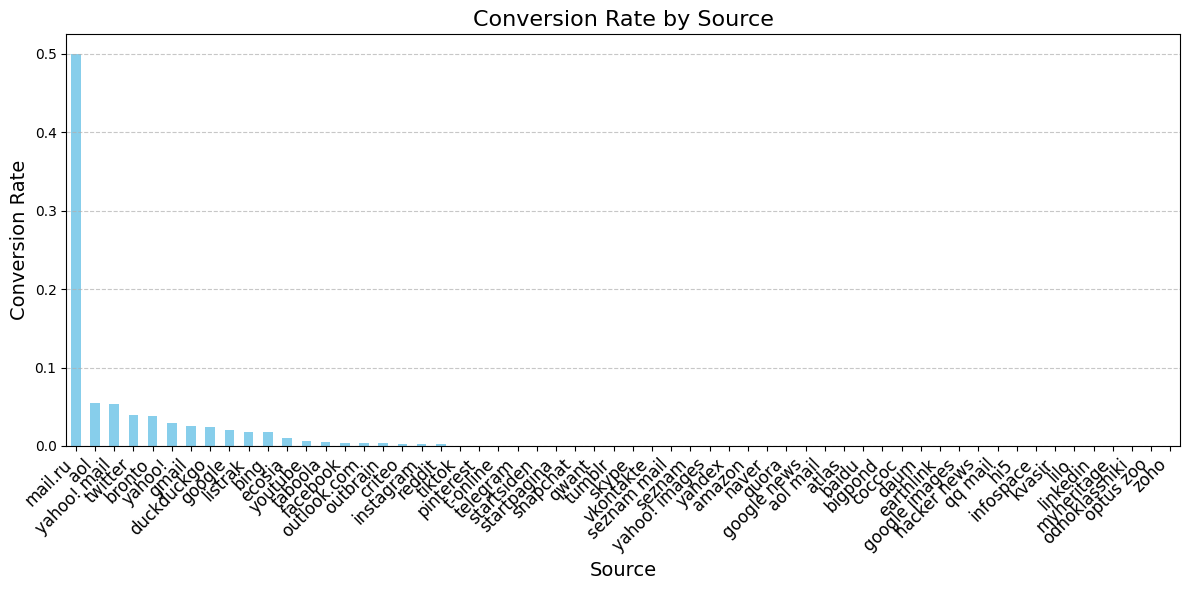

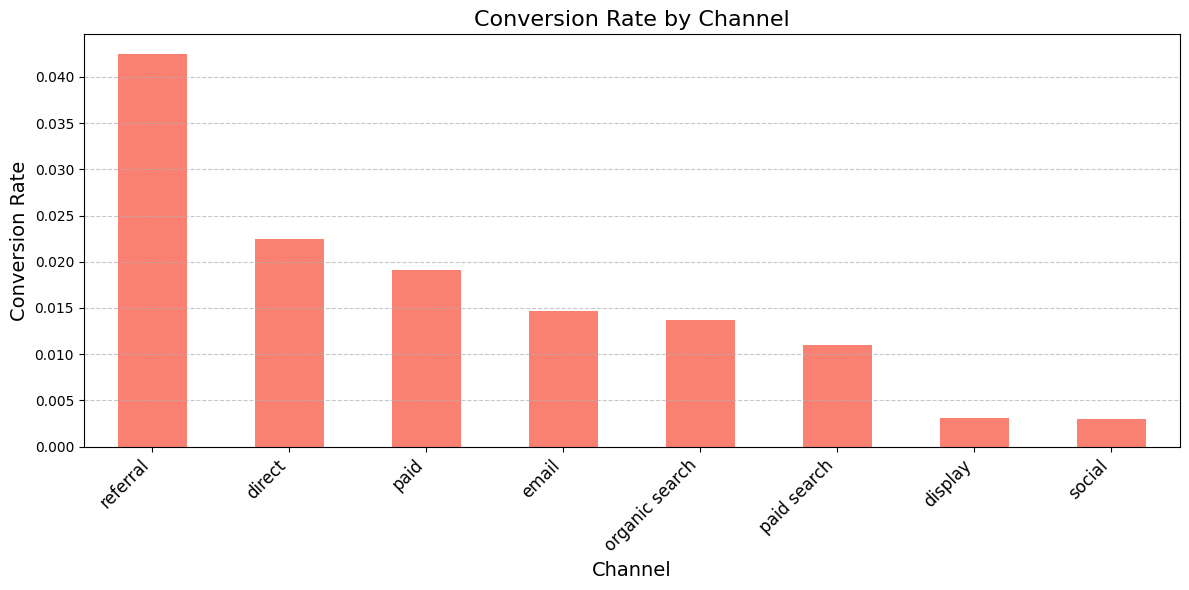

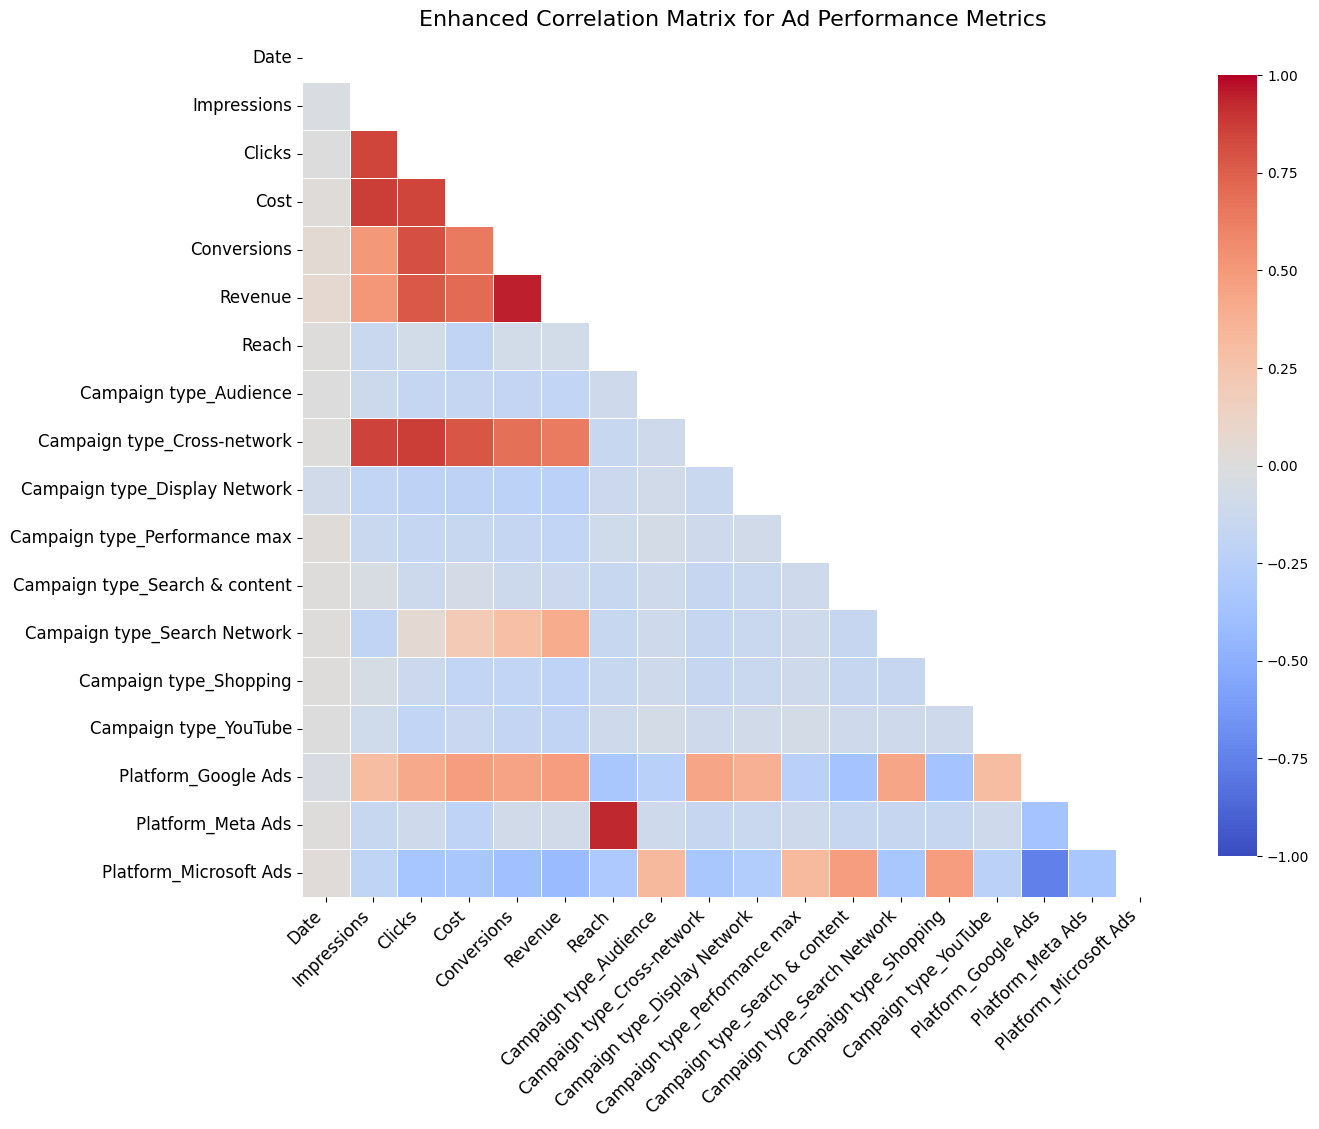

In [3]:
conversion_rate_by_source = website_landings_df.groupby('Source')['Is Converted'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
conversion_rate_by_source.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Source', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
conversion_rate_by_channel = website_landings_df.groupby('Channel')['Is Converted'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
conversion_rate_by_channel.plot(kind='bar', color='salmon')
plt.title('Conversion Rate by Channel', fontsize=16)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xlabel('Channel', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df_encoded = pd.get_dummies(ads_data, columns=['Campaign type', 'Platform'])
plt.figure(figsize=(14, 12))
corr_matrix = df_encoded.corr()
cmap = sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            annot=False,
            cmap=cmap, 
            linewidths=0.5, 
            mask=mask, 
            vmin=-1, 
            vmax=1, 
            square=True, 
            cbar_kws={"shrink": .8})
plt.title('Enhanced Correlation Matrix for Ad Performance Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

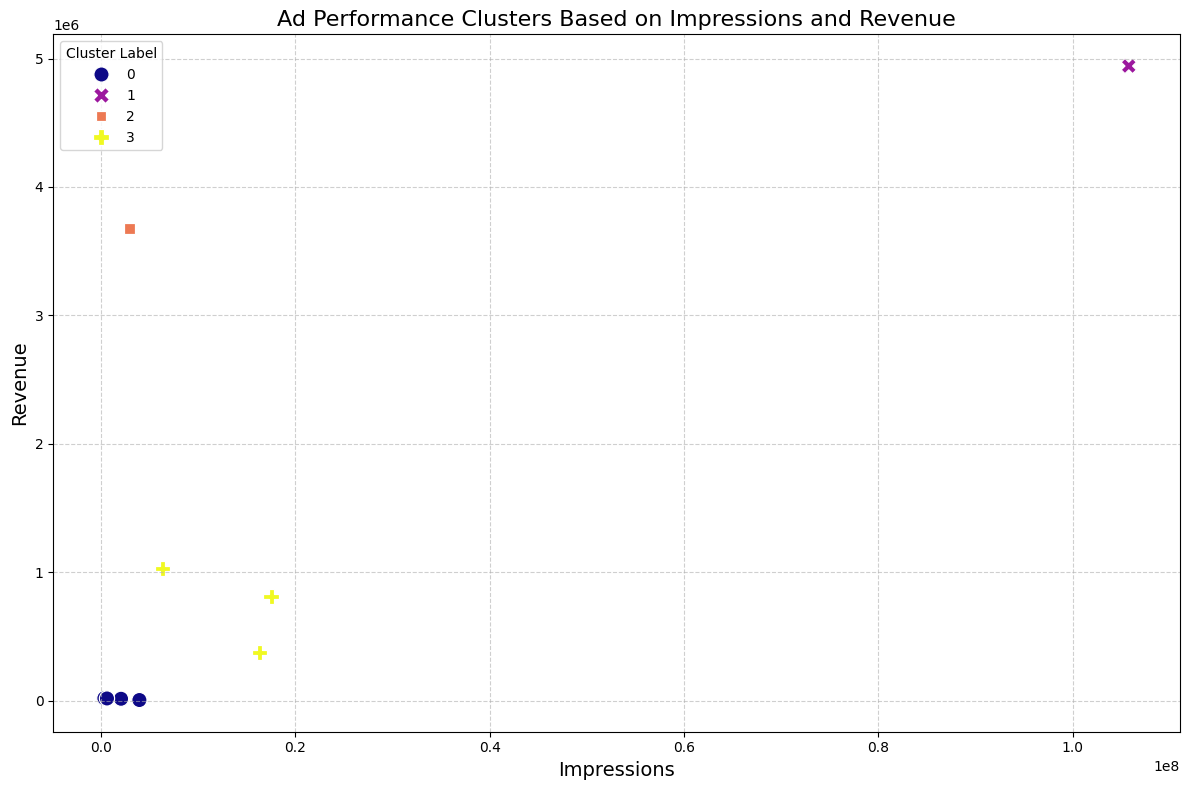

In [4]:
os.environ['OMP_NUM_THREADS'] = '1'
ads_data['Click_Through_Rate'] = ads_data['Clicks'] / ads_data['Impressions']
ads_data['Cost_Per_Click'] = ads_data['Cost'] / ads_data['Clicks']
ads_data['Cost_Per_Acquisition'] = ads_data['Cost'] / ads_data['Conversions']
ads_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ads_data.fillna(0, inplace=True)
performance_metrics = ads_data.groupby(['Platform', 'Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()
scaler = StandardScaler()
metrics_features = ['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']
X_standardized = scaler.fit_transform(performance_metrics[metrics_features])
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=15)
performance_metrics['Cluster_Label'] = kmeans_model.fit_predict(X_standardized)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=performance_metrics,
    x='Impressions',
    y='Revenue',
    hue='Cluster_Label',
    palette='plasma',
    style='Cluster_Label',
    s=120,
    legend='full'
)
plt.title('Ad Performance Clusters Based on Impressions and Revenue', fontsize=16)
plt.xlabel('Impressions', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.legend(title='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [5]:
X = ads_data[['Impressions', 'Clicks', 'Cost']]
y = ads_data['Conversions']
model = LinearRegression()
model.fit(X, y)
ads_data['Predicted Conversions'] = model.predict(X)
total_budget = 200000
min_budget_per_channel = 0.1 * total_budget
def allocate_budget(df, total_budget):
    df['Budget Allocation'] = (df['Predicted Conversions'] / df['Predicted Conversions'].sum()) * total_budget
    return df
budget_allocation = allocate_budget(ads_data, total_budget)
def enforce_min_budget(df, min_budget):
    df['Budget Allocation'] = df['Budget Allocation'].apply(lambda x: max(x, min_budget))
    return df
budget_allocation = enforce_min_budget(budget_allocation, min_budget_per_channel)
print(budget_allocation[['Platform', 'Campaign type', 'Predicted Conversions', 'Budget Allocation']])

           Platform     Campaign type  Predicted Conversions  \
0        Google Ads     Cross-network              22.086743   
1        Google Ads   Display Network               2.564213   
2        Google Ads    Search Network              20.834734   
3        Google Ads           YouTube              -5.318414   
4        Google Ads     Cross-network              36.084514   
...             ...               ...                    ...   
1080  Microsoft Ads          Shopping              12.803476   
1081  Microsoft Ads  Search & content               8.745776   
1082  Microsoft Ads          Shopping              13.905857   
1083  Microsoft Ads  Search & content               7.393468   
1084  Microsoft Ads          Shopping              10.964223   

      Budget Allocation  
0               20000.0  
1               20000.0  
2               20000.0  
3               20000.0  
4               20000.0  
...                 ...  
1080            20000.0  
1081            20000.0

Aggregated Budget and Conversion Data:
        Platform     Campaign type  Budget Allocation  Predicted Conversions
0     Google Ads     Cross-network          7280000.0           29242.132559
1     Google Ads   Display Network          5480000.0            1309.010179
2     Google Ads    Search Network          7280000.0           17893.111151
3     Google Ads           YouTube          3640000.0            -342.951049
4       Meta Ads                 0          7280000.0            6372.849481
5  Microsoft Ads          Audience          3640000.0             584.418966
6  Microsoft Ads   Performance max          3500000.0             787.974873
7  Microsoft Ads  Search & content          7280000.0            4218.730834
8  Microsoft Ads          Shopping          7280000.0            3007.923005


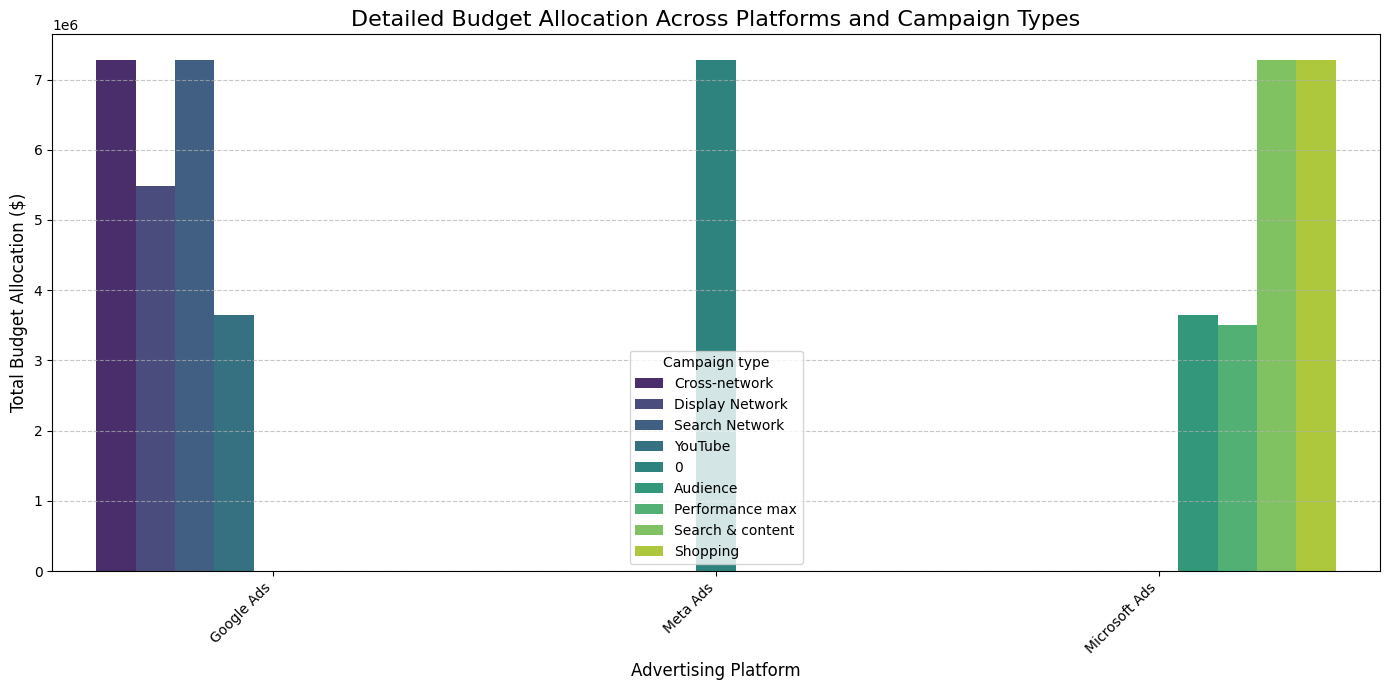

In [6]:
budget_summary = (
    budget_allocation
    .groupby(['Platform', 'Campaign type'])
    .agg({
        'Budget Allocation': 'sum',
        'Predicted Conversions': 'sum'
    })
    .reset_index()
)
print("Aggregated Budget and Conversion Data:")
print(budget_summary)
plt.figure(figsize=(14, 7))
bar_plot = sns.barplot(
    x='Platform',
    y='Budget Allocation',
    hue='Campaign type',
    data=budget_summary,
    palette='viridis'
)
plt.title('Detailed Budget Allocation Across Platforms and Campaign Types', fontsize=16)
plt.xlabel('Advertising Platform', fontsize=12)
plt.ylabel('Total Budget Allocation ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
if 'CTR' not in ads_data.columns:
    ads_data['CTR'] = ads_data['Clicks'] / ads_data['Impressions']
if 'CPC' not in ads_data.columns:
    ads_data['CPC'] = ads_data['Cost'] / ads_data['Clicks']
ads_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ads_data.fillna(0, inplace=True)
X = ads_data[['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC']]
y = ads_data['Conversions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train head:")
print(X_train.head())
print("\nX_test head:")
print(X_test.head())

X_train head:
     Impressions  Clicks    Cost       CTR       CPC
852      58096.0   606.0   608.5  0.010431  1.004125
3        17354.0   324.0   131.2  0.018670  0.404938
379     127894.0   680.0   599.6  0.005317  0.881765
565         48.0     0.0     0.3  0.000000  0.000000
482       8127.0   486.0  1782.2  0.059801  3.667078

X_test head:
     Impressions  Clicks   Cost       CTR       CPC
152      15332.0   285.0   99.1  0.018589  0.347719
266      22676.0   436.0  116.3  0.019227  0.266743
930      19809.0   265.0  123.7  0.013378  0.466792
243      89215.0   555.0  806.4  0.006221  1.452973
291      14924.0   249.0   93.8  0.016685  0.376707


In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Linear Regression - R2 Score:", r2_score(y_test, lr_predictions))

Linear Regression - RMSE: 33.88376164274998
Linear Regression - R2 Score: 0.2613464273053272


In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest - R2 Score:", r2_score(y_test, rf_predictions))

Random Forest - RMSE: 10.916670348990985
Random Forest - R2 Score: 0.9233277939921125


In [10]:
total_budget_amount = 200000
minimum_budget_threshold = 0.1 * total_budget_amount
def allocate_ad_budget(dataframe, total_budget):
    df_copy = dataframe.copy()
    conversion_total = df_copy['Predicted Conversions'].sum()
    df_copy['Allocated Budget'] = (df_copy['Predicted Conversions'] / conversion_total) * total_budget
    return df_copy
def apply_minimum_budget(df, min_budget):
    df_adjusted = df.copy()
    df_adjusted.loc[df_adjusted['Allocated Budget'] < min_budget, 'Allocated Budget'] = min_budget
    return df_adjusted
allocated_budget_df = allocate_ad_budget(ads_data, total_budget_amount)
final_budget_df = apply_minimum_budget(allocated_budget_df, minimum_budget_threshold)
budget_summary_df = (
    final_budget_df
    .groupby(['Platform', 'Campaign type'])
    .agg({
        'Allocated Budget': 'sum',
        'Predicted Conversions': 'sum'
    })
    .reset_index()
)
print("Final Budget Allocation Summary:")
print(budget_summary_df)

Final Budget Allocation Summary:
        Platform     Campaign type  Allocated Budget  Predicted Conversions
0     Google Ads     Cross-network         7280000.0           29242.132559
1     Google Ads   Display Network         5480000.0            1309.010179
2     Google Ads    Search Network         7280000.0           17893.111151
3     Google Ads           YouTube         3640000.0            -342.951049
4       Meta Ads                 0         7280000.0            6372.849481
5  Microsoft Ads          Audience         3640000.0             584.418966
6  Microsoft Ads   Performance max         3500000.0             787.974873
7  Microsoft Ads  Search & content         7280000.0            4218.730834
8  Microsoft Ads          Shopping         7280000.0            3007.923005


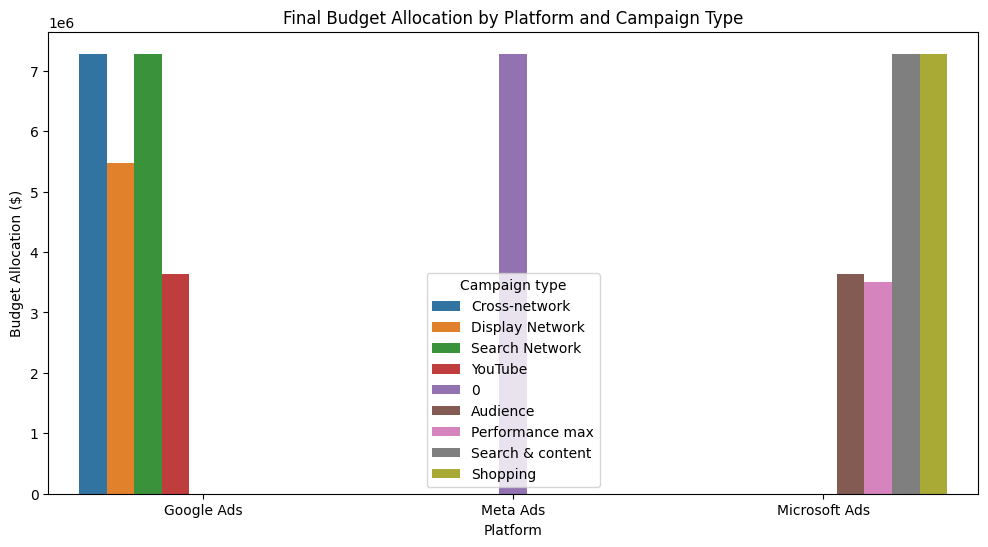

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Budget Allocation', hue='Campaign type', data=budget_summary)
plt.title('Final Budget Allocation by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Budget Allocation ($)')
plt.show()

In [12]:
user_input_allocation = {
    ('Google Ads', 'Cross-network'): 8000,
    ('Google Ads', 'Display Network'): 5000,
    ('Google Ads', 'Search Network'): 7000,
    ('Google Ads', 'YouTube'): 3000,
    ('Meta Ads', '0'): 6000,
    ('Microsoft Ads', 'Audience'): 4000,
    ('Microsoft Ads', 'Performance max'): 3000,
    ('Microsoft Ads', 'Search & content'): 6000,
    ('Microsoft Ads', 'Shopping'): 5000
}
for index, row in budget_summary.iterrows():
    platform = row['Platform']
    campaign = row['Campaign type']
    if (platform, campaign) in user_input_allocation:
        budget_summary.at[index, 'Budget Allocation'] = user_input_allocation[(platform, campaign)]

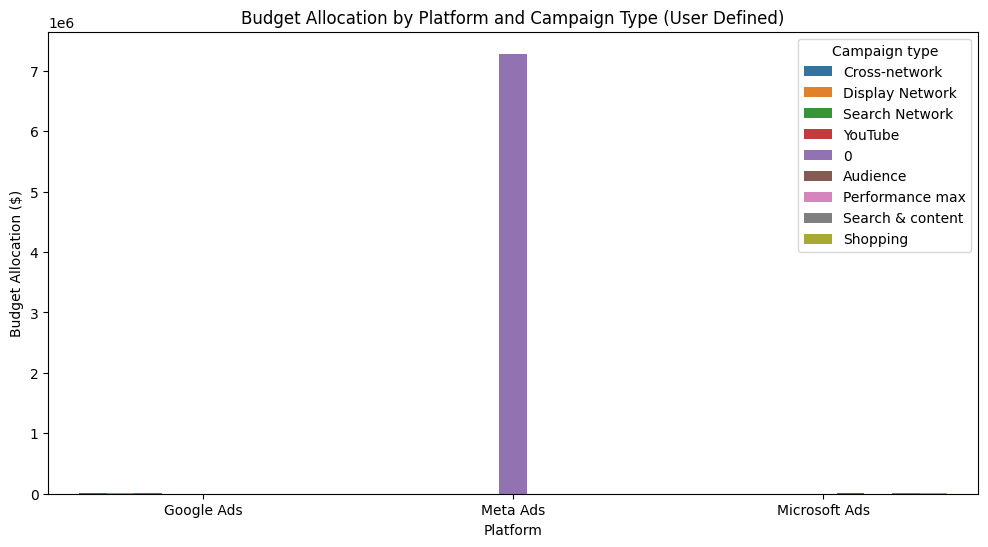

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Budget Allocation', hue='Campaign type', data=budget_summary)
plt.title('Budget Allocation by Platform and Campaign Type (User Defined)')
plt.xlabel('Platform')
plt.ylabel('Budget Allocation ($)')
plt.show()

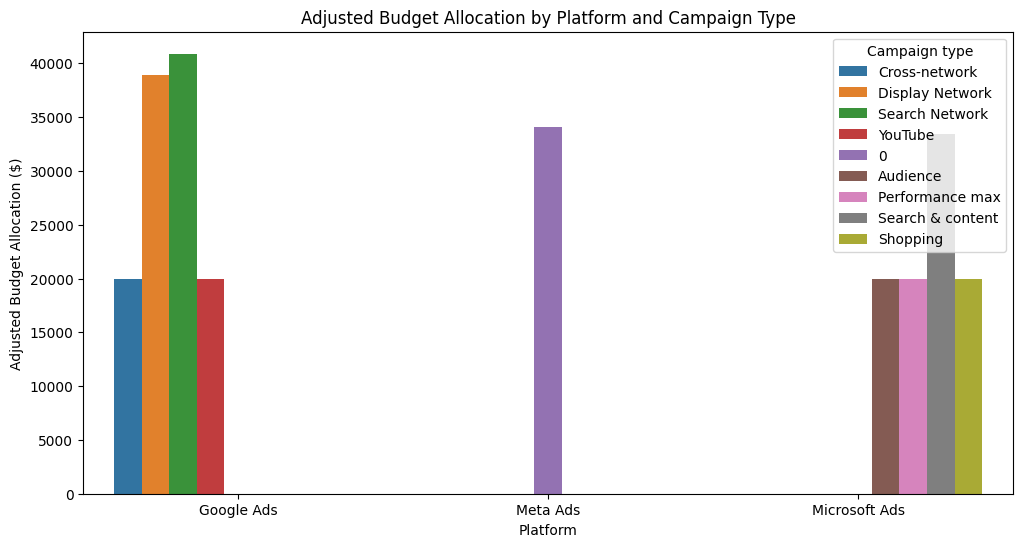

In [14]:
def adjust_budget_allocation(budget_df, feedback_df, total_budget):
    feedback_df['Feedback Score'] = feedback_df['Predicted Conversions'] / feedback_df['Predicted Conversions'].sum()
    budget_df['Adjusted Budget Allocation'] = (feedback_df['Feedback Score'] * total_budget).clip(lower=0.1 * total_budget)
    return budget_df
def enforce_min_budget(df, min_budget):
    df.loc[df['Adjusted Budget Allocation'] < min_budget, 'Adjusted Budget Allocation'] = min_budget
    return df
feedback_df = budget_summary.copy()
feedback_df['Predicted Conversions'] = np.random.uniform(1000, 20000, size=len(feedback_df))
total_budget = 200000
min_budget_per_channel = 0.1 * total_budget
budget_allocation_adjusted = adjust_budget_allocation(budget_summary, feedback_df, total_budget)
budget_allocation_adjusted = enforce_min_budget(budget_allocation_adjusted, min_budget_per_channel)
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Adjusted Budget Allocation', hue='Campaign type', data=budget_allocation_adjusted)
plt.title('Adjusted Budget Allocation by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Adjusted Budget Allocation ($)')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    results[name] = -scores.mean()
print("Model Comparison Results:")
for name, score in results.items():
    print(f"{name}: RMSE = {np.sqrt(score)}")

Model Comparison Results:
Linear Regression: RMSE = 22.217034753246836
Random Forest: RMSE = 14.296315902179126
Gradient Boosting: RMSE = 13.433681158091513


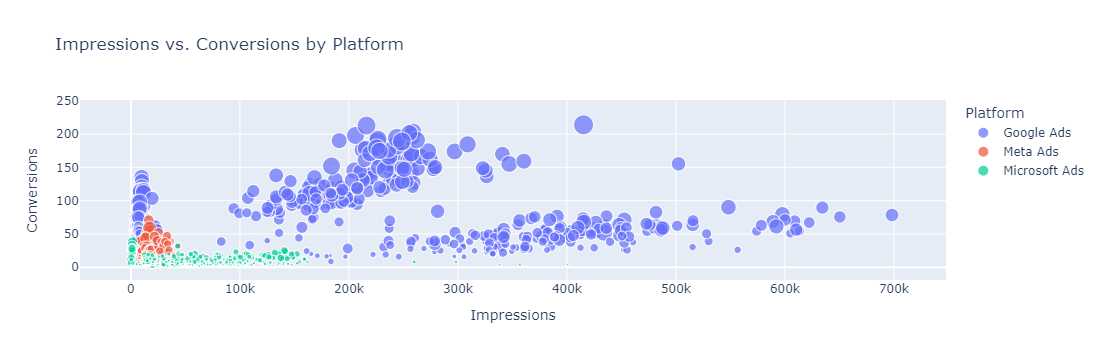

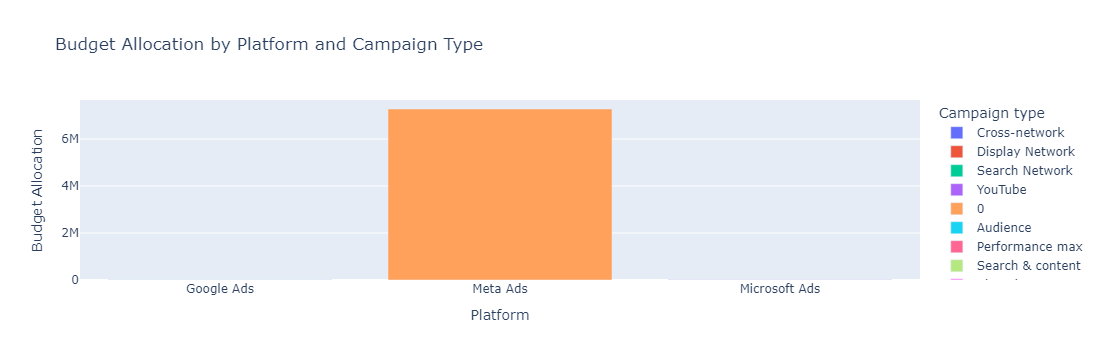

In [16]:
import plotly.express as px
fig = px.scatter(ads_data, x='Impressions', y='Conversions', color='Platform', size='Revenue', hover_name='Campaign type',
                 title='Impressions vs. Conversions by Platform', labels={'Impressions': 'Impressions', 'Conversions': 'Conversions'})
fig.show()
fig = px.bar(budget_summary, x='Platform', y='Budget Allocation', color='Campaign type', title='Budget Allocation by Platform and Campaign Type')
fig.show()

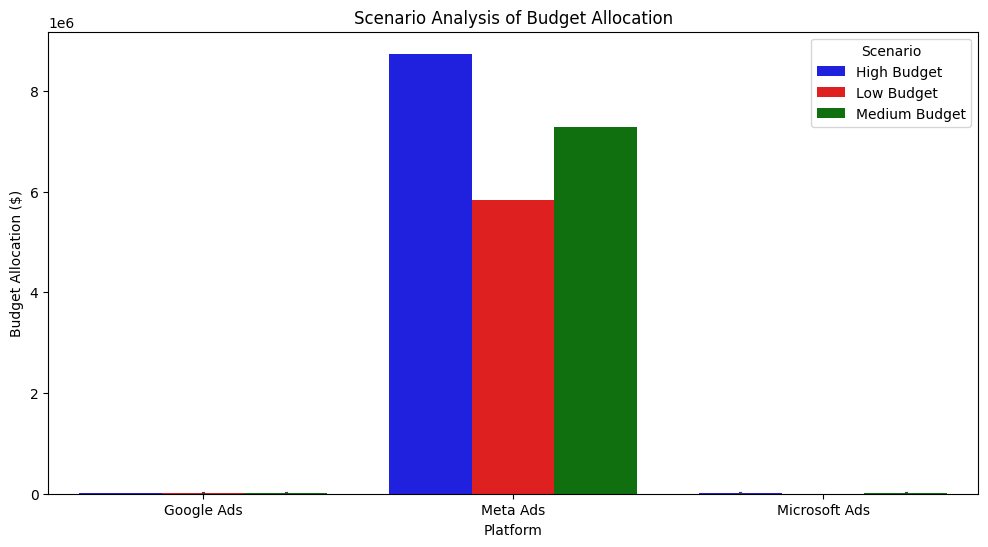

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def scenario_analysis(df, scenario_name, adjustment_factor):
    df_scenario = df.copy()
    df_scenario['Scenario Budget Allocation'] = df['Budget Allocation'] * adjustment_factor
    df_scenario['Scenario Predicted Conversions'] = df['Predicted Conversions'] * adjustment_factor
    df_scenario['Scenario Name'] = scenario_name
    return df_scenario
scenarios = [
    ('High Budget', 1.2),
    ('Low Budget', 0.8),
    ('Medium Budget', 1.0)
]
df_scenarios = pd.concat([
    scenario_analysis(budget_summary, name, factor)
    for name, factor in scenarios
])
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Scenario Budget Allocation', hue='Scenario Name', data=df_scenarios, palette={'High Budget': 'blue', 'Low Budget': 'red', 'Medium Budget': 'green'})
plt.title('Scenario Analysis of Budget Allocation')
plt.xlabel('Platform')
plt.ylabel('Budget Allocation ($)')
plt.legend(title='Scenario')
plt.show()

In [19]:
import dash
print("Dash version:", dash.__version__)

Dash version: 2.17.1


In [20]:
def allocate_budget(total_budget, allocation_ratios):
    """
    Allocate the total budget across platforms based on the provided allocation ratios.
    
    total_budget: int or float, the total budget to allocate.
    allocation_ratios: dict, the ratio of budget allocation for each platform.

    Returns a dictionary with the allocated budget for each platform.
    """
    allocated_budgets = {}
    for platform, ratio in allocation_ratios.items():
        allocated_budgets[platform] = total_budget * ratio
    return allocated_budgets

In [21]:
allocation_ratios = {
    'Facebook': 0.4,
    'Google Ads': 0.3,
    'Microsoft Ads': 0.3
}
total_budget = 1000
allocated_budgets = allocate_budget(total_budget, allocation_ratios)
allocated_budget_df = pd.DataFrame(list(allocated_budgets.items()), columns=['Platform', 'Budget Allocation'])
for platform, budget in allocated_budgets.items():
    print(f"{platform}: {budget} USD")

Facebook: 400.0 USD
Google Ads: 300.0 USD
Microsoft Ads: 300.0 USD


In [22]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import pandas as pd
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1('Ad Performance Dashboard'),
    dcc.Input(
        id='total-budget-input',
        type='number',
        placeholder='Enter total budget',
        value=1000
    ),
    dcc.Dropdown(
        id='platform-dropdown',
        options=[{'label': platform, 'value': platform} for platform in allocation_ratios.keys()],
        value=list(allocation_ratios.keys())[0]
    ), 
    dcc.Graph(id='budget-allocation-bar'),
    dcc.Graph(id='conversion-prediction-scatter')
])

In [23]:
@app.callback(
    [Output('budget-allocation-bar', 'figure'),
     Output('conversion-prediction-scatter', 'figure')],
    [Input('platform-dropdown', 'value'),
     Input('total-budget-input', 'value')]
)
def update_graphs(selected_platform, total_budget):
    allocated_budgets = allocate_budget(total_budget, allocation_ratios)
    allocated_budget_df = pd.DataFrame(list(allocated_budgets.items()), columns=['Platform', 'Budget Allocation'])
    filtered_data = allocated_budget_df[allocated_budget_df['Platform'] == selected_platform]
    fig_budget = {
        'data': [
            go.Bar(
                x=filtered_data['Platform'],
                y=filtered_data['Budget Allocation']
            )
        ],
        'layout': go.Layout(
            title='Budget Allocation by Platform',
            xaxis={'title': 'Platform'},
            yaxis={'title': 'Budget Allocation ($)'}
        )
    }
    fig_conversion = {
        'data': [
            go.Scatter(
                x=ads_data['Impressions'],
                y=ads_data['Conversions'],
                mode='markers',
                marker=dict(size=ads_data['Revenue'] / 1000),
                text=ads_data['Platform']
            )
        ],
        'layout': go.Layout(
            title='Impressions vs. Conversions',
            xaxis={'title': 'Impressions'},
            yaxis={'title': 'Conversions'}
        )
    }
    return fig_budget, fig_conversion

In [24]:
if __name__ == '__main__':
    app.run_server(debug=True)